In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist

# -----------------------------
# Step 1: Load Fashion-MNIST
# -----------------------------
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankleboot"]

print("Training shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)


print("\nClasses in dataset are: ")
for i, cl in enumerate(class_names):
  print(f'{i+1}. {cl}')

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training shape: (60000, 28, 28) (60000,)
Test shape: (10000, 28, 28) (10000,)

Classes in dataset are: 
1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankleboot


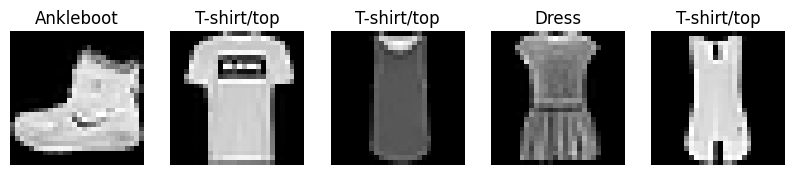

In [2]:

# -----------------------------
# Step 2: Display 5 sample images
# -----------------------------
plt.figure(figsize=(10, 2))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")

plt.show()

In [3]:

# -----------------------------
# Step 3: Preprocess (flatten + scale)
# -----------------------------
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.astype(np.float32))
x_test = scaler.transform(x_test.astype(np.float32))

# SVM is slow on 60k samples → take subset
n_train, n_test = 10000, 2000
x_train, y_train = x_train[:n_train], y_train[:n_train]
x_test, y_test = x_test[:n_test], y_test[:n_test]

In [16]:
# -----------------------------
# Step 4: Train SVM with different hyperparameters
# -----------------------------
kernels = ["linear", "rbf", "poly"]
C_values = [0.1, 1, 5 ,  10 , 15 , 20 ]

results = {}
for kernel in kernels:
    for C in C_values:
        print(f"")
        svm = SVC(kernel=kernel, C=C, gamma="scale")
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        results[(kernel, C)] = acc
        print(f"SVM with kernel={kernel}  C={C} -> Accuracy = {acc:.4f}")




SVM with kernel=linear  C=0.1 -> Accuracy = 0.8340

SVM with kernel=linear  C=1 -> Accuracy = 0.8170

SVM with kernel=linear  C=5 -> Accuracy = 0.8010

SVM with kernel=linear  C=10 -> Accuracy = 0.7985

SVM with kernel=linear  C=15 -> Accuracy = 0.7985

SVM with kernel=linear  C=20 -> Accuracy = 0.7985

SVM with kernel=rbf  C=0.1 -> Accuracy = 0.8035

SVM with kernel=rbf  C=1 -> Accuracy = 0.8560

SVM with kernel=rbf  C=5 -> Accuracy = 0.8705

SVM with kernel=rbf  C=10 -> Accuracy = 0.8715

SVM with kernel=rbf  C=15 -> Accuracy = 0.8690

SVM with kernel=rbf  C=20 -> Accuracy = 0.8685

SVM with kernel=poly  C=0.1 -> Accuracy = 0.7085

SVM with kernel=poly  C=1 -> Accuracy = 0.8280

SVM with kernel=poly  C=5 -> Accuracy = 0.8600

SVM with kernel=poly  C=10 -> Accuracy = 0.8630

SVM with kernel=poly  C=15 -> Accuracy = 0.8660

SVM with kernel=poly  C=20 -> Accuracy = 0.8665


In [17]:
import pandas as pd

# Create a DataFrame from the results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
# Create a new MultiIndex with the desired names
new_index = pd.MultiIndex.from_tuples(results_df.index, names=['Kernel', 'C'])
# Assign the new MultiIndex to the DataFrame
results_df.index = new_index
display(results_df)

Accuracy
Kernel C             
linear 0.1     0.8340
       1.0     0.8170
       5.0     0.8010
       10.0    0.7985
       15.0    0.7985
       20.0    0.7985
rbf    0.1     0.8035
       1.0     0.8560
       5.0     0.8705
       10.0    0.8715
       15.0    0.8690
       20.0    0.8685
poly   0.1     0.7085
       1.0     0.8280
       5.0     0.8600
       10.0    0.8630
       15.0    0.8660
       20.0    0.8665

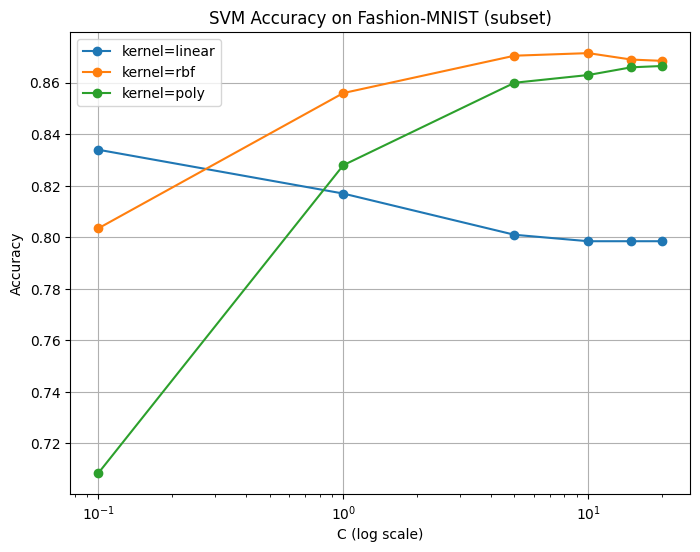

In [18]:

# -----------------------------
# Step 5: Plot accuracy results
# -----------------------------
plt.figure(figsize=(8,6))
for kernel in kernels:
    accs = [results[(kernel, C)] for C in C_values]
    plt.plot(C_values, accs, marker="o", label=f"kernel={kernel}")

plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.title("SVM Accuracy on Fashion-MNIST (subset)")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Find the row with the maximum accuracy in results_df
best_result = results_df.loc[results_df['Accuracy'].idxmax()]

# Print the best result
print("Best SVM Hyperparameters and Accuracy:")
print(best_result)

Best SVM Hyperparameters and Accuracy:
Accuracy    0.8715
Name: (rbf, 10.0), dtype: float64
